### importing important libraries

In [11]:
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### loading data

In [8]:
address = "C:/Users/hp/Desktop/Kifya/Week_8&9/Data/clean/"
df = pd.read_csv(address + "final_fraud.csv")
df = df.drop(columns=['user_id','ip_address','device_id'])
df.head()

,signup_time,purchase_value,sex,age,class,frequency,hour_of_day,Day_of_Week,perchase_time,recent_purchase_time,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,country_nan
0,2015-02-24 22:55:49,34,M,39,0,1,2,Saturday,2015-04-18 02:47:11,2015-04-18 02:47:11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-06-07 20:39:50,16,F,53,0,1,1,Monday,2015-06-08 01:38:54,2015-06-08 01:38:54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 18:52:44,15,M,53,1,1,18,Thursday,2015-01-01 18:52:45,2015-01-01 18:52:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-04-28 21:13:25,44,M,41,0,1,13,Monday,2015-05-04 13:54:50,2015-05-04 13:54:50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2015-07-21 07:09:52,39,M,45,0,1,18,Wednesday,2015-09-09 18:40:53,2015-09-09 18:40:53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


split the data

In [9]:
x = df.select_dtypes(include=['int', 'float']).drop(columns=['class'], errors='ignore')
y = df['class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [12]:
numerical_cols = x.select_dtypes(include=['int', 'float']).columns.tolist()
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

train the models

In [13]:

Lr_model = LogisticRegression()
Random_model = RandomForestClassifier(n_estimators=100, random_state=42)

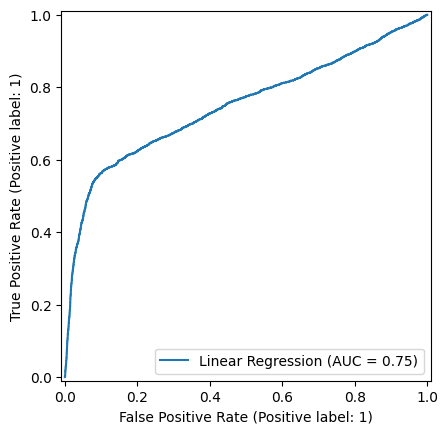

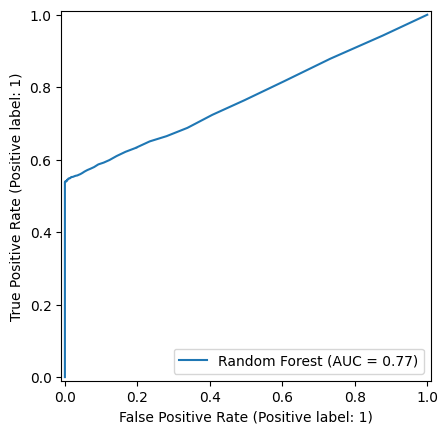

In [14]:
models = {
    "Linear Regression": Lr_model,
    "Random Forest": Random_model,
}

results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    RocCurveDisplay.from_estimator(model, X_test, Y_test, name=name)

# Shaply Explainer

## Linear Regression

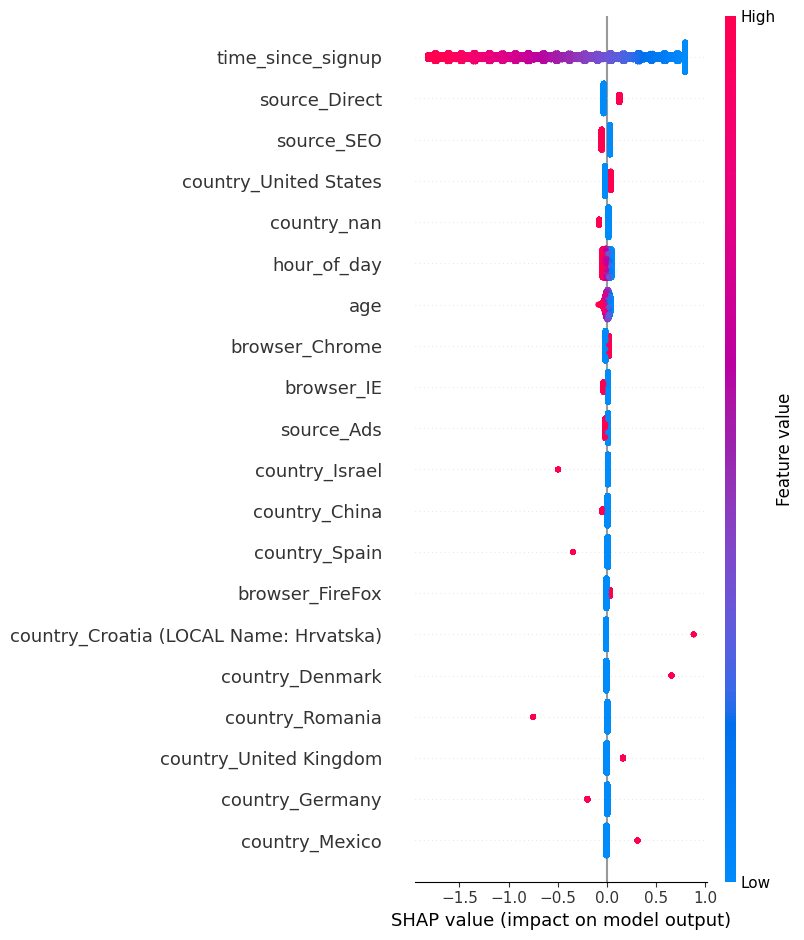

In [15]:
explainer = shap.Explainer(Lr_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

## Random Forest

In [16]:
explainer = shap.Explainer(Random_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)